## Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [136]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [137]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [138]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [139]:
df['Age'].isnull().sum()

177

In [140]:
## It pick 1 random sample of age from dataset after removing null values
## df['Age'].dropna().sample 

## It picks 177 random age from Age after frop NAN from Age colomn
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [141]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [142]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    
    ## It will have the random sample to fill the NA
    random_samples = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    
    ##pandas need to have same index in order to merge the dataset
    random_samples.index = df[df[variable].isnull()].index
    
    ## This loate the columns that have NAN and make new Column name variable_random and fill the values with random_samples
    ## If variable_random is already exist then it will replace the existing values in that column
    df.loc[df[variable].isnull(), variable+"_random"] = random_samples  
    

In [143]:
median = df['Age'].median()
median

28.0

In [144]:
impute_nan(df, "Age", median)

In [145]:
df.head(40) ## We can see that NaN replaced with median value and Random Values

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


In [146]:
## let's ploting graph to compare distribution of AGE and AGE_RANDOM

import matplotlib.pyplot as plt
%matplotlib inline

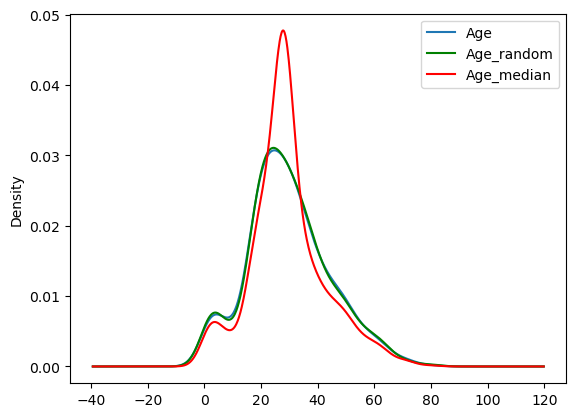

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax = ax)
df['Age_random'].plot(kind = 'kde', ax = ax, color='green')
df['Age_median'].plot(kind = 'kde', ax = ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## We can see that distribution of AGE and AGE_RANDOM are same while AGE_MEDIAN got distorted

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

##### Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [150]:
import numpy as np
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [156]:
df['Age_NaN'] = np.where(df['Age'].isnull(), 1, 0)
df.head(20)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [159]:
df['Age'].fillna(df.Age.median(), inplace = True)

In [160]:
df.head(20)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement 
2. Captures the importance of missing values

#### Disadvantages
1. Creating Additional Features ( Leads to Curse of Dimentionality )

## End of Distribution imputation

In [162]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


<Axes: >

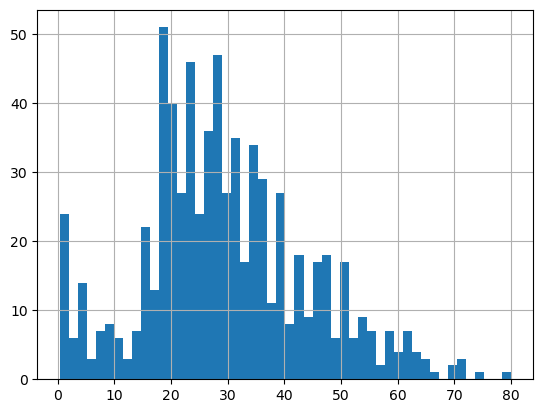

In [168]:
df.Age.hist(bins = 50)

In [182]:
extream = df.Age.mean()+3*df.Age.std()

<Axes: xlabel='Age'>

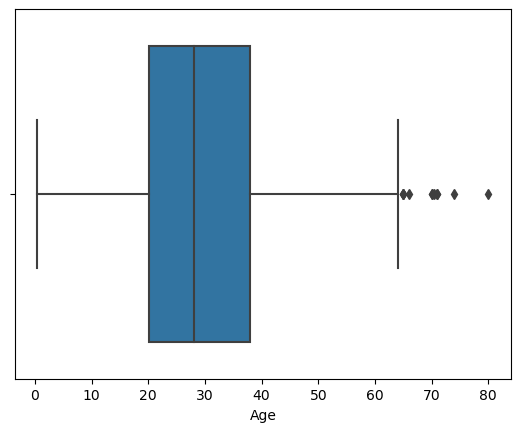

In [177]:
import seaborn as sns
sns.boxplot(x ='Age', data=df)

In [183]:
def impute_nan(df, variable, median, extream):
    df[variable+"_end_distribution"] = df['Age'].fillna(extream)
    df[variable].fillna(median, inplace=True)

In [184]:
impute_nan(df, 'Age', df.Age.median(), extream)

In [185]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: >

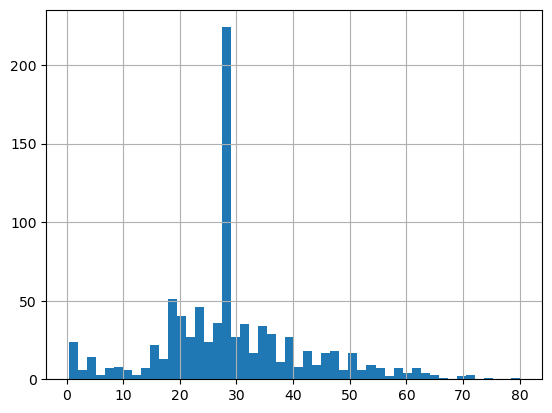

In [186]:
df['Age'].hist(bins=50)

<Axes: >

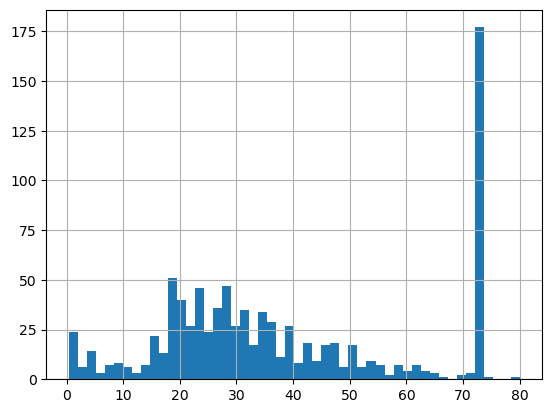

In [187]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

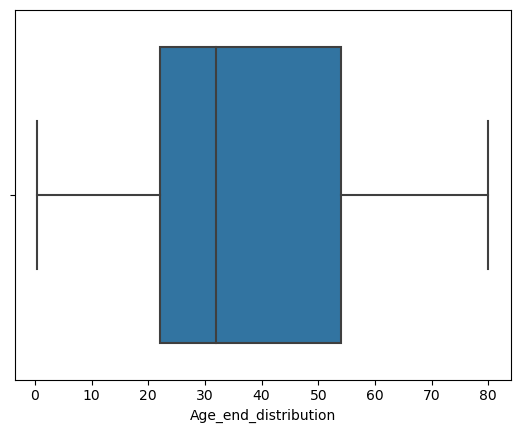

In [189]:
sns.boxplot(x = 'Age_end_distribution', data = df)

## No outliers ( They captured by using this method)

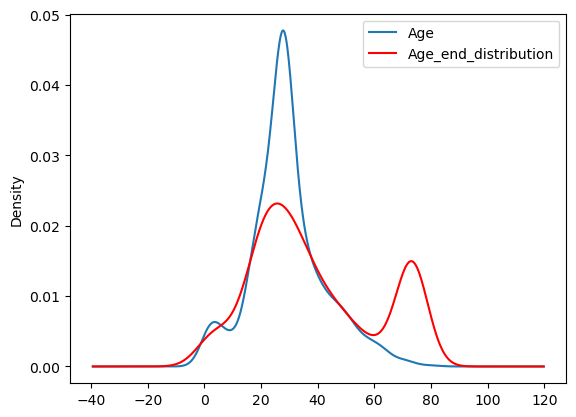

In [192]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Age_end_distribution'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

## Advantages

 - Easy to implement
 - Captures the importance of missingeness if there is one
 
## Disadvantages

 - Distorts the original distribution of the variable
 - If missingess is not important, it may the predictive power of the original variable by distorting its distribution
 - If the number of NA is big, it will mask two outlier in the distribution
 - If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent spet of 
   feature engineering